In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer #Visualizacion

In [2]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples #Metricas

In [3]:
import os
path=os.getcwd()[:-38]+"Data/movies_tad.pickle"

In [4]:
df=pd.read_pickle(path)

In [5]:
df #tad peliculas, no hay mucho con que clusterizar
#Las dummies afectan al modelo

,movieId,title,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,...,genre_mystery,genre_no,genre_romance,genre_scifi,genre_thriller,genre_war,genre_western,rating_mean,rating_min,rating_max
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,3.920930,0.5,5.0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3.431818,0.5,5.0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,3.259615,0.5,5.0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,2.357143,1.0,3.0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3.071429,0.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,4.000000,4.0,4.0
9720,193583,No Game No Life: Zero (2017),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,3.500000,3.5,3.5
9721,193585,Flint (2017),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3.500000,3.5,3.5
9722,193587,Bungo Stray Dogs: Dead Apple (2018),1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3.500000,3.5,3.5


In [6]:
X = df.set_index(["movieId", "title"]) #Configuramos indice

In [7]:
X

,,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,...,genre_mystery,genre_no,genre_romance,genre_scifi,genre_thriller,genre_war,genre_western,rating_mean,rating_min,rating_max
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,3.920930,0.5,5.0
2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3.431818,0.5,5.0
3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,3.259615,0.5,5.0
4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,2.357143,1.0,3.0
5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3.071429,0.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,4.000000,4.0,4.0
193583,No Game No Life: Zero (2017),0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,3.500000,3.5,3.5
193585,Flint (2017),0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,3.500000,3.5,3.5


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler()

In [10]:
Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)

In [11]:
Xs #Data escalada

,,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,...,genre_mystery,genre_no,genre_romance,genre_scifi,genre_thriller,genre_war,genre_western,rating_mean,rating_min,rating_max
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.760207,0.000000,1.000000
2,Jumanji (1995),0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.651515,0.000000,1.000000
3,Grumpier Old Men (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.613248,0.000000,1.000000
4,Waiting to Exhale (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.412698,0.111111,0.555556
5,Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.777778,0.777778
193583,No Game No Life: Zero (2017),0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667
193585,Flint (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667


In [12]:
from sklearn.cluster import KMeans

In [13]:
lst_inertia = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xs)
    lst_inertia.append(cl.inertia_)

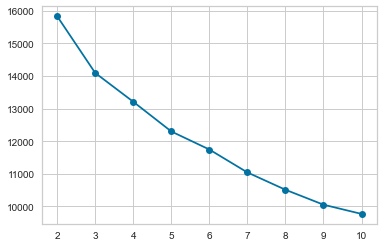

In [14]:
plt.plot(range(2,11),lst_inertia,marker='o')

In [15]:
"""Como el codo no da info usamos la silueta"""
lst_silhouette = []
for k in range(2,11):
    cl_sil = KMeans(n_clusters=k)
    cl_sil.fit(Xs)
    lst_silhouette.append(silhouette_score(Xs,cl_sil.predict(Xs)))
    #compara maxima cohension y separacion

''

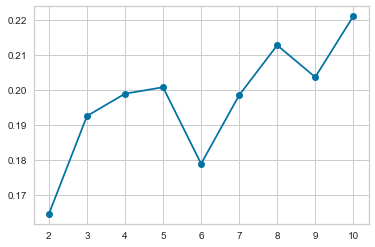

In [16]:
plt.plot(range(2,11),lst_silhouette,marker='o')
""""""

In [17]:
lst_dbscore=[]
for k in range(2,11):
    cl_db = KMeans(n_clusters=k)
    cl_db.fit(Xs)
    lst_dbscore.append(davies_bouldin_score(Xs,cl_db.predict(Xs)))
    #Mas pequeño mejor


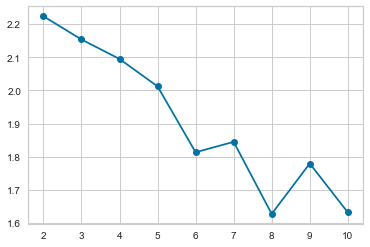

In [18]:
plt.plot(range(2,11),lst_dbscore,marker='o')

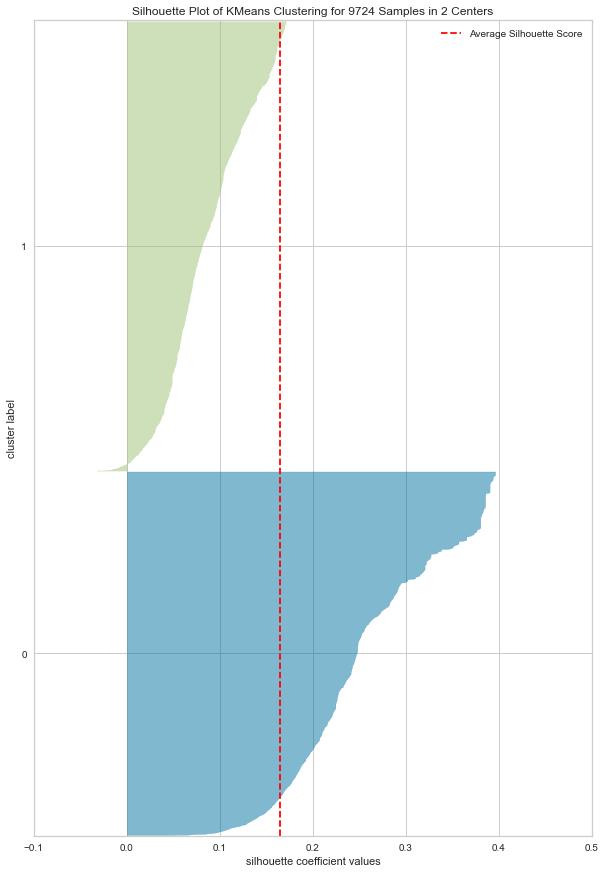

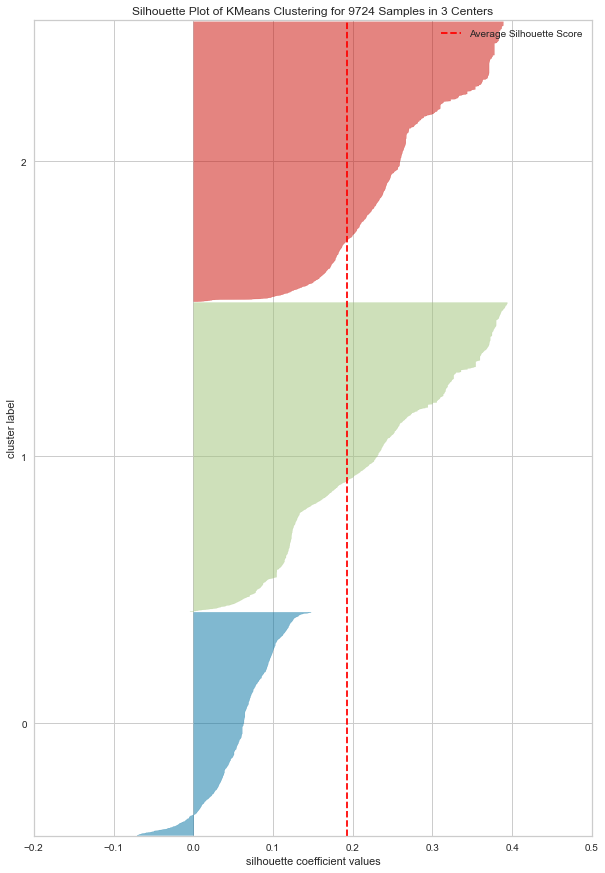

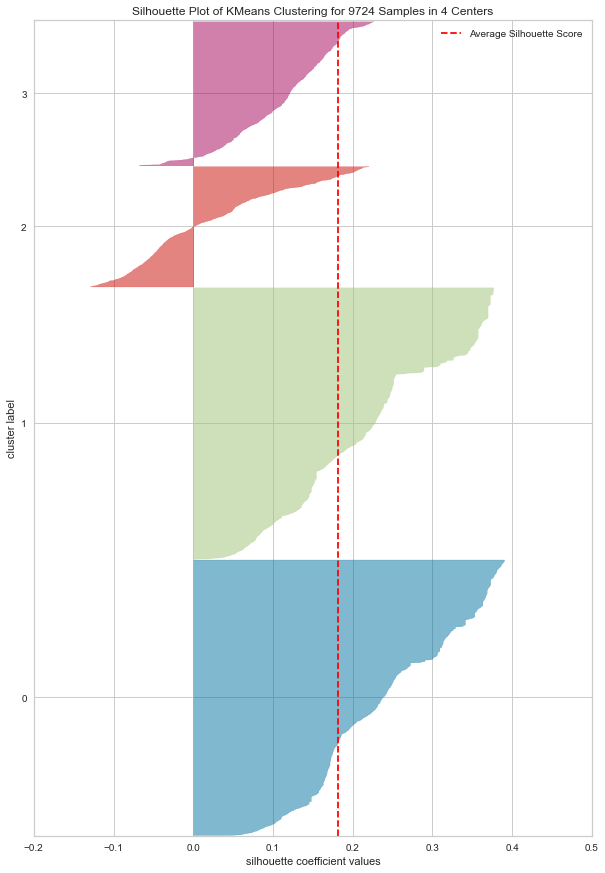

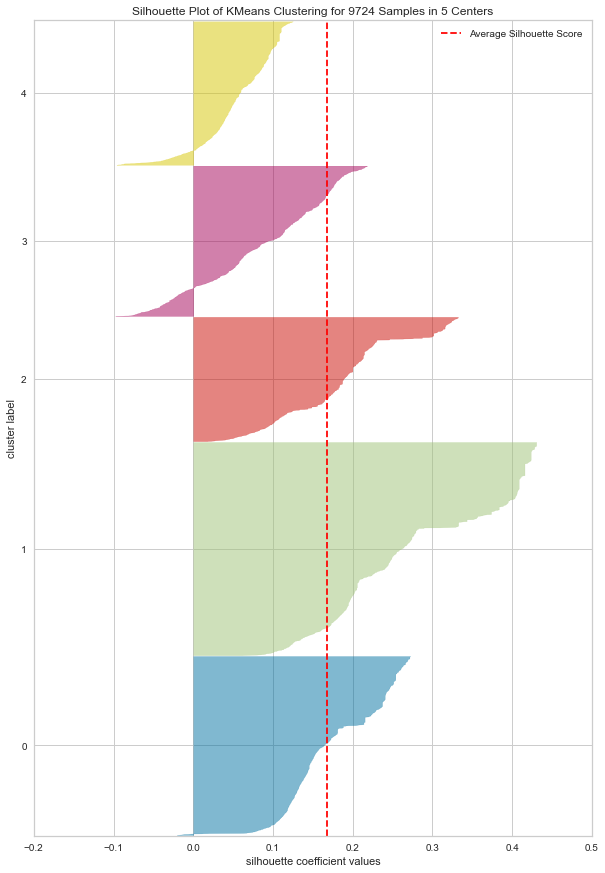

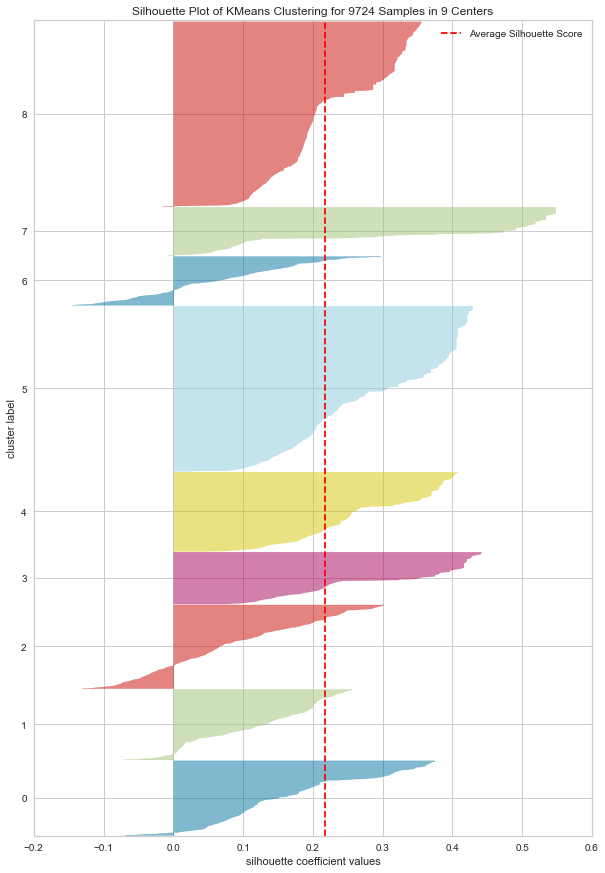

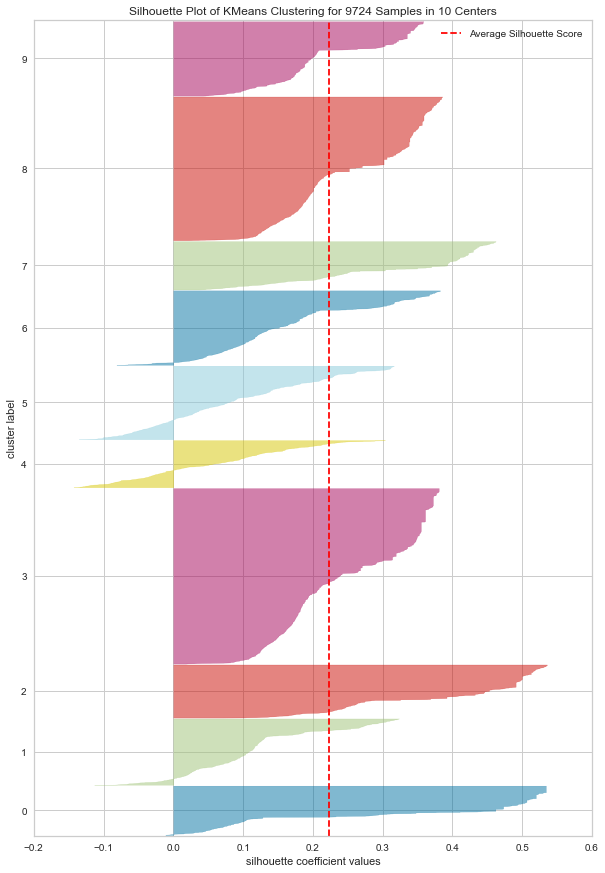

In [19]:
#fig, ax = plt.subplots(6, 1, figsize=(10,15))

"""Visualizacion de la silueta,
epramos que todos los grupos tenga la misma
silueta y el ancho del grupo.
Cercano a uno y noa tan grande"""

for j,i in enumerate([2, 3, 4, 5, 9, 10]):
    fig, ax = plt.subplots(figsize=(10,15))
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)


    visualizer = SilhouetteVisualizer(km,ax=ax, colors='yellowbrick',)
    
    visualizer.fit(Xs)
    visualizer.show()

In [20]:
cluster = KMeans(n_clusters=9, random_state=10)

from sklearn.metrics import pairwise_distances

In [21]:
X["cl"] = Xs["cl"]= cluster.fit_predict(Xs)

In [22]:
X['cl']

movieId  title                                    
1        Toy Story (1995)                             4
2        Jumanji (1995)                               4
3        Grumpier Old Men (1995)                      7
4        Waiting to Exhale (1995)                     1
5        Father of the Bride Part II (1995)           7
                                                     ..
193581   Black Butler: Book of the Atlantic (2017)    4
193583   No Game No Life: Zero (2017)                 4
193585   Flint (2017)                                 2
193587   Bungo Stray Dogs: Dead Apple (2018)          0
193609   Andrew Dice Clay: Dice Rules (1991)          7
Name: cl, Length: 9724, dtype: int32

In [23]:
X.groupby("cl").mean().style.background_gradient(cmap='Blues') #Perfilamiento

,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,genre_genres,genre_horror,genre_imax,genre_listed,genre_musical,genre_mystery,genre_no,genre_romance,genre_scifi,genre_thriller,genre_war,genre_western,rating_mean,rating_min,rating_max
cl,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.012987,0.047619,0.008658,0.116883,0.419913,0.001082,0.410173,0.032468,0.005411,0.000000,0.023810,0.037879,0.000000,0.000000,0.062771,0.000000,0.022727,0.186147,0.495671,0.083333,0.027056,3.107506,2.091450,3.894481
1,0.016824,0.019979,0.011567,0.019979,1.000000,0.059937,0.003155,1.000000,0.047319,0.001052,0.000000,0.008412,0.001052,0.000000,0.033649,0.016824,0.000000,0.354364,0.015773,0.016824,0.028391,0.002103,3.414860,2.586225,4.028391
2,0.007194,0.048561,0.014838,0.015737,0.000000,0.089029,0.005845,1.000000,0.044065,0.012140,0.000000,0.016187,0.003597,0.000000,0.032824,0.044514,0.000000,0.234712,0.033723,0.000000,0.075989,0.018435,3.516756,2.810252,4.029002
3,0.001168,0.028037,0.005841,0.001168,0.028037,0.348131,0.001168,0.696262,0.037383,0.039720,0.000000,0.093458,0.005841,0.000000,0.002336,0.261682,0.000000,0.081776,0.086449,1.000000,0.024533,0.004673,3.272891,2.377921,3.919977
4,0.082397,0.599251,0.664794,0.893258,0.507491,0.011236,0.000000,0.082397,0.428839,0.000000,0.000000,0.007491,0.058052,0.000000,0.151685,0.018727,0.000000,0.065543,0.102996,0.001873,0.005618,0.007491,3.281360,2.180712,4.094569
5,0.856072,0.989505,0.079460,0.031484,0.160420,0.040480,0.001499,0.188906,0.265367,0.001499,0.000000,0.025487,0.079460,0.000000,0.002999,0.031484,0.000000,0.070465,0.359820,0.235382,0.058471,0.026987,3.123369,1.794603,4.068966
6,0.129032,0.007444,0.014888,0.002481,0.196030,0.044665,0.002481,0.031017,0.075682,0.001241,0.000000,0.992556,0.013648,0.000000,0.004963,0.117866,0.000000,0.012407,0.244417,0.442928,0.001241,0.008685,2.811121,2.083127,3.434864
7,0.071698,0.051415,0.024528,0.047170,0.996698,0.069340,0.007075,0.000000,0.043868,0.000000,0.000000,0.004717,0.001887,0.000000,0.047170,0.015094,0.000000,0.241981,0.047642,0.020755,0.012736,0.015094,3.059551,2.171698,3.805425
8,0.000000,0.006231,0.070093,0.001558,0.032710,0.060748,0.626168,0.006231,0.020249,0.024922,0.052960,0.000000,0.015576,0.052960,0.060748,0.028037,0.052960,0.056075,0.079439,0.000000,0.026480,0.052960,3.730179,3.389408,4.000000


In [24]:
from sklearn_extra.cluster import KMedoids #Instalar scikit-learn-extra

In [25]:
#Dsitancias admitidas
['braycurtis', 'canberra', 'chebyshev',
  'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis',
  'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
  'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']

['braycurtis',
 'canberra',
 'chebyshev',
 'correlation',
 'dice',
 'hamming',
 'jaccard',
 'kulsinski',
 'mahalanobis',
 'minkowski',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule']

In [26]:
#Metricas
['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
  'manhattan']

['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']

In [27]:
medoids=KMedoids(n_clusters=6, metric='euclidean',method='pam')
#method como se va calculando el algoritmo

In [28]:
Xs.iloc[:,:-1] #Quitamos la columna de la anterior configuracion

,,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_fantasy,genre_filmnoir,...,genre_mystery,genre_no,genre_romance,genre_scifi,genre_thriller,genre_war,genre_western,rating_mean,rating_min,rating_max
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.760207,0.000000,1.000000
2,Jumanji (1995),0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.651515,0.000000,1.000000
3,Grumpier Old Men (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.613248,0.000000,1.000000
4,Waiting to Exhale (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.412698,0.111111,0.555556
5,Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.777778,0.777778
193583,No Game No Life: Zero (2017),0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667
193585,Flint (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.666667


In [29]:
medoids.fit_predict(Xs.iloc[:,:-1])

array([1, 4, 1, ..., 0, 4, 1])

In [30]:
X["cl_medoids"] = Xs["cl_medoids"]= medoids.fit_predict(Xs.iloc[:,:-1])
#Con varios metodos de cluster se perfila para ver cual hace mas sentido

In [31]:
X['cl_medoids'].value_counts(1)

0    0.331756
1    0.276224
4    0.121966
5    0.112608
3    0.103764
2    0.053682
Name: cl_medoids, dtype: float64

In [32]:
X['cl'].value_counts(1)

2    0.228712
7    0.218017
1    0.097799
0    0.095023
3    0.088030
6    0.082888
5    0.068593
8    0.066022
4    0.054916
Name: cl, dtype: float64

In [33]:
len(cluster.cluster_centers_)

9

In [34]:
len(medoids.cluster_centers_)

6

In [35]:
cluster.cluster_centers_ #centroides kmedias

array([[ 1.00000000e+00,  1.29870130e-02,  4.76190476e-02,
         8.65800866e-03,  1.16883117e-01,  4.19913420e-01,
         1.08225108e-03,  4.10173160e-01,  3.24675325e-02,
         5.41125541e-03, -1.56125113e-17,  2.38095238e-02,
         3.78787879e-02, -1.56125113e-17, -1.11022302e-16,
         6.27705628e-02, -1.56125113e-17,  2.27272727e-02,
         1.86147186e-01,  4.95670996e-01,  8.33333333e-02,
         2.70562771e-02,  5.79445756e-01,  3.53655604e-01,
         7.54329004e-01],
       [ 1.68243954e-02,  1.99789695e-02,  1.15667718e-02,
         1.99789695e-02,  1.00000000e+00,  5.99369085e-02,
         3.15457413e-03,  1.00000000e+00,  4.73186120e-02,
         1.05152471e-03, -1.64798730e-17,  8.41219769e-03,
         1.05152471e-03, -1.64798730e-17,  3.36487907e-02,
         1.68243954e-02, -1.64798730e-17,  3.54363828e-01,
         1.57728707e-02,  1.68243954e-02,  2.83911672e-02,
         2.10304942e-03,  6.47746685e-01,  4.63605561e-01,
         7.84086926e-01],
    

In [36]:
medoids.cluster_centers_ #centroides medoides

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.66666667, 0.55555556, 0.77777778],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.55555556, 0.33333333, 0.77777778],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.77777778, 0.